In [48]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import copy, random, matplotlib
import pandas as pd

In [62]:
#Reading data set
import pandas as pd
import os
Monthly_Salary=pd.read_csv("Budget Data.csv")
Monthly_Salary

,3504,ASST CITY ATTY,1,"143,627",2017,March,ATTORNEY,ASST CITY ATTY.1,1.1
0,2114,LITIGATION ASST 1,1,"67,232",2017.0,March,ATTORNEY,LITIGATION ASST 1,2.0
1,1351,CLERK-TYP 2,1,"48,896",2017.0,March,ATTORNEY,CLERK-TYP 2,3.0
2,3630,ASST CITY ATTY,1,"144,933",2017.0,March,ATTORNEY,ASST CITY ATTY,4.0
3,3074,SECRETARY 3-LEGAL,1,"59,614",2017.0,March,ATTORNEY,SECRETARY 3-LEGAL,5.0
4,2963,ATTY CITY,1,"160,114",2017.0,March,ATTORNEY,ATTY CITY,6.0
...,...,...,...,...,...,...,...,...,...
70599,10691,POLICE OFFICER-11,1,"57,179",2019.0,Febuary,POLICE,POLICE OFFICER,2937.0
70600,10692,POLICE OFFICER-11,1,"57,179",2019.0,Febuary,POLICE,POLICE OFFICER,2938.0
70601,10693,POLICE OFFICER-11,1,"57,179",2019.0,Febuary,POLICE,POLICE OFFICER,2939.0
70602,1106,POLICE SGT-11,1,"87,751",2019.0,Febuary,POLICE,POLICE SGT,2940.0


In [50]:
Eng_Salary = Monthly_Salary[Monthly_Salary["Location"]=="ENGINEERIN"]

In [51]:
c= Eng_Salary[(Eng_Salary["Current Salary"]=="VACANT")&(Eng_Salary["Authoried Position"] != "VACANT")]
c.groupby("Authoried Position").count()


,Employee #,Position Description,Filled FTE Percent,Current Salary,Year,Month,Location,Position number
Authoried Position,,,,,,,,
ACCOUNTANT 2,3,3,3,3,3,3,3,3
ARCHITECT 3,2,2,2,2,2,2,2,2
CONSTRUCT INSP 2,3,3,3,3,3,3,3,3
CUSTODIAL SERV,8,8,8,8,8,8,8,8
CUSTODIAL WKR 1,20,20,20,20,20,20,20,20
CUSTODIAL WKR 2,50,50,50,50,50,50,50,50
ELEC/HEAT INSPECTOR,1,1,1,1,1,1,1,1
ELECTRICIAN,6,6,6,6,6,6,6,6
ENGINEER 3,1,1,1,1,1,1,1,1


In [57]:
Eng_Salary_na[Eng_Salary_na["Employee #"]=='5764']

,Employee #,Position Description,Filled FTE Percent,Current Salary,Year,Month,Location,Authoried Position,Position number,Month in Number,YearMonth
2886,5764,ACCOUNTANT 2,0.6,34520,2017,March,ENGINEERIN,ACCOUNTANT 2,2887.0,03,2017/03
5827,5764,ACCOUNTANT 2,0.6,34520,2017,April,ENGINEERIN,ACCOUNTANT 2,2887.0,04,2017/04
8769,5764,ACCOUNTANT 2,0.6,34520,2017,May,ENGINEERIN,ACCOUNTANT 2,2887.0,05,2017/05
11711,5764,ACCOUNTANT 2,0.6,34520,2017,June,ENGINEERIN,ACCOUNTANT 2,2887.0,06,2017/06
14653,5764,ACCOUNTANT 2,0.6,35211,2017,July,ENGINEERIN,ACCOUNTANT 2,2887.0,07,2017/07
17595,5764,ACCOUNTANT 2,0.6,35211,2017,August,ENGINEERIN,ACCOUNTANT 2,2887.0,08,2017/08


In [60]:
d =24 - Eng_Salary_na.groupby(["Authoried Position","Position number"])["Position Description"].count()
print(d.to_string())

Authoried Position    Position number
ACCOUNTANT 2          2887.0              3
ACCOUNTANT 3          413.0              23
                      414.0               1
ADMIN ASST            440.0               0
ADMIN CLK 1           203.0              23
ARCHITECT 3           2046.0              0
                      2310.0              0
                      2814.0              2
ARCHITECT 4           175.0              23
                      176.0               1
ASST CITY ENGINEER    444.0               0
                      453.0               0
CCTV INSPEC TECH      2848.0              0
                      2849.0              0
                      2850.0              0
CIVIL TECH 2          412.0              23
                      413.0               1
CODE ENFORC OFF 3     192.0              23
COMP MAP/GIS COORD    399.0              23
                      400.0               1
CONSTRUCT INSP 1      392.0               1
                      426.0           

In [54]:
#remove NA/cleanning data set 
Eng_Salary_na = Eng_Salary.dropna()
#remove Vacant
Eng_Salary_na = Eng_Salary_na[(Eng_Salary_na["Employee #"] != "VACANT") & (Eng_Salary_na["Position Description"] != "VACANT") & (Eng_Salary_na["Month"] != "VACANT") & (Eng_Salary_na["Filled FTE Percent"] != "VACANT") & (Eng_Salary_na["Current Salary"] != "VACANT") & (Eng_Salary_na["Year"] != "VACANT") ]
#Change the data type of salary
Eng_Salary_na["Current Salary"] = Eng_Salary_na["Current Salary"].str.replace(",","").astype(int)
Eng_Salary_na["Year"] = Eng_Salary_na["Year"].astype(int).astype(str)
#Use numbers to represent months
def label_month (row):
    if row['Month'] == "January" :
        return "01"
    if row['Month'] == "Febuary" :
        return "02"
    if row['Month'] == "March" :
        return "03"
    if row['Month'] == "April" :
        return "04"
    if row['Month'] == "May" :
        return "05"
    if row['Month'] == "June" :
        return "06"
    if row['Month'] == "July" :
        return "07"
    if row['Month'] == "August" :
        return "08"
    if row['Month'] == "September" :
        return "09"
    if row['Month'] == "October" :
        return "10"
    if row['Month'] == "November" :
        return "11"
    if row['Month'] == "December" :
        return "12"
Eng_Salary_na['Month in Number'] = Eng_Salary_na.apply (lambda row: label_month(row), axis=1)
#new column
Eng_Salary_na["YearMonth"] = Eng_Salary_na["Year"] + "/" + Eng_Salary_na["Month in Number"]

In [55]:
Eng_Salary_na

,Employee #,Position Description,Filled FTE Percent,Current Salary,Year,Month,Location,Authoried Position,Position number,Month in Number,YearMonth
174,2318,CUSTODIAL WKR 2,1,54263,2017,March,ENGINEERIN,CUSTODIAL WKR 2,175.0,03,2017/03
175,4111,ARCHITECT 4,1,102465,2017,March,ENGINEERIN,ARCHITECT 4,176.0,03,2017/03
182,1142,ENGINEER 3,1,84656,2017,March,ENGINEERIN,ENGINEER 3,183.0,03,2017/03
186,2104,MAINT MECH 2,1,68202,2017,March,ENGINEERIN,MAINT MECH 2,187.0,03,2017/03
191,3178,CUSTODIAL WKR 2,1,51356,2017,March,ENGINEERIN,CUSTODIAL WKR 2,192.0,03,2017/03
...,...,...,...,...,...,...,...,...,...,...,...
70554,4153,LANDSCAPE ARCHITECT 2,1,66487,2019,Febuary,ENGINEERIN,LANDSCAPE ARCHITECT2,2891.0,02,2019/02
70558,9089,ENGINEER 2,1,72495,2019,Febuary,ENGINEERIN,ENGINEER 2,2895.0,02,2019/02
70559,10356,ELECTRICIAN,1,40741,2019,Febuary,ENGINEERIN,ELECTRICIAN,2896.0,02,2019/02
70570,9052,CONSTRUCTION MGR,1,83377,2019,Febuary,ENGINEERIN,CONSTRUCTION MGR,2907.0,02,2019/02


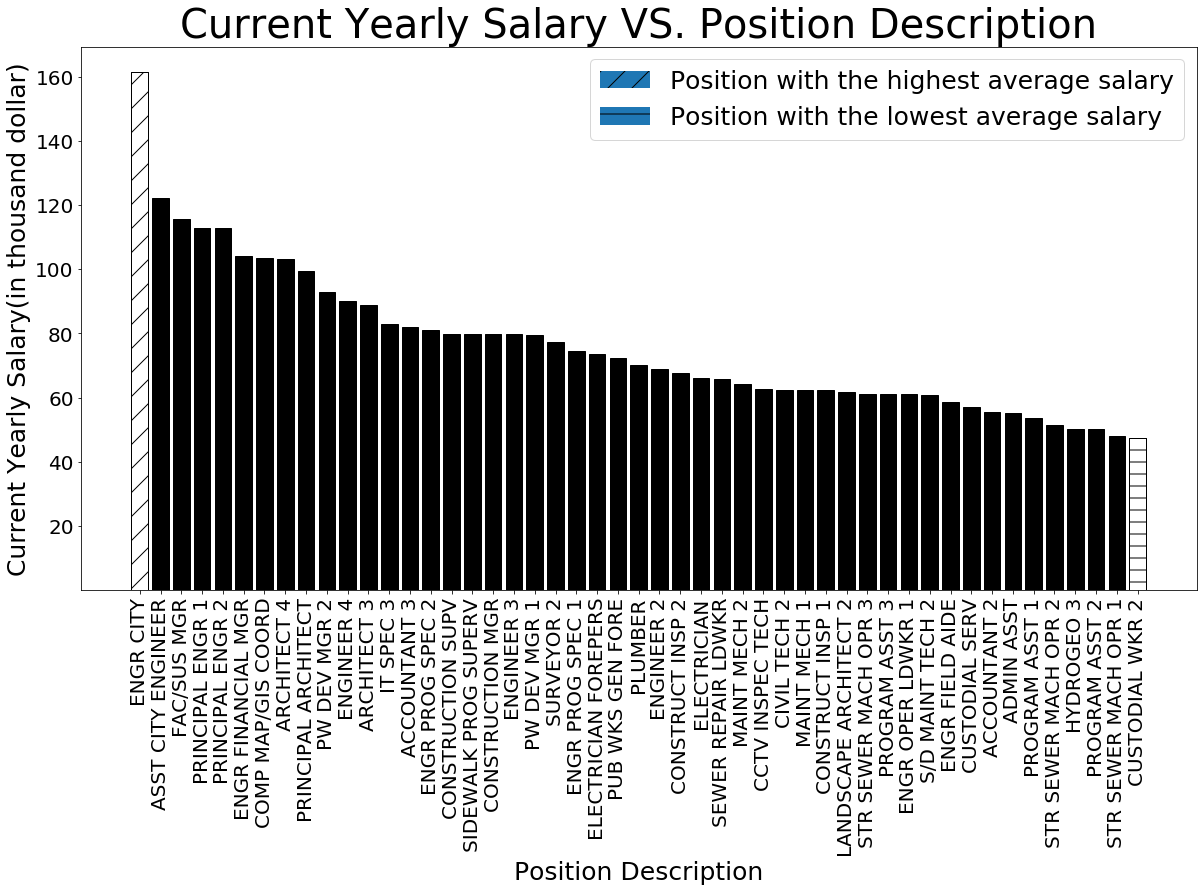

In [48]:
#Average Current salary and Position
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
patterns = [ "/","-" ]
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
bx = Eng_Salary_na.groupby("Position Description")["Current Salary"].mean().reset_index().sort_values(['Current Salary'],ascending=False) 
#bx=Eng_Salary_na.groupby("Position Description")["Current Salary"].agg({'count':mean}).sort_values(['Current Salary'],ascending=False) 
plt.rcParams["figure.figsize"] = [20,10]

plt.bar(bx["Position Description"], bx["Current Salary"], color='black',edgecolor = "black")
plt.bar(bx["Position Description"][20], bx["Current Salary"][20],hatch=patterns[0],color='white',edgecolor = "black")
plt.bar(bx["Position Description"][14], bx["Current Salary"][14],hatch=patterns[1],color='white',edgecolor = "black" )

#plot.bar(kind = 'bar',figsize=(12,6),x="Position Description",color='black')
plt.title('Current Yearly Salary VS. Position Description',fontsize=40)
plt.xlabel('Position Description',fontsize=25)
plt.xticks(rotation=90,fontsize=20)
plt.ylabel('Current Yearly Salary(in thousand dollar)',fontsize=25)
plt.yticks([20000,40000,60000,80000,100000,120000,140000,160000],
        ['20','40','60','80','100','120','140','160'],fontsize=20)
red_patch = mpatches.Patch(hatch=patterns[0], label='Position with the highest average salary')
blue_patch = mpatches.Patch(hatch=patterns[1], label='Position with the lowest average salary')
plt.legend(handles=[red_patch,blue_patch],fontsize = 25)
#plt.legend(handles[0]=[blue_patch],handles[1]=[blue_patch])

#print(bx)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text yticklabel objects>)

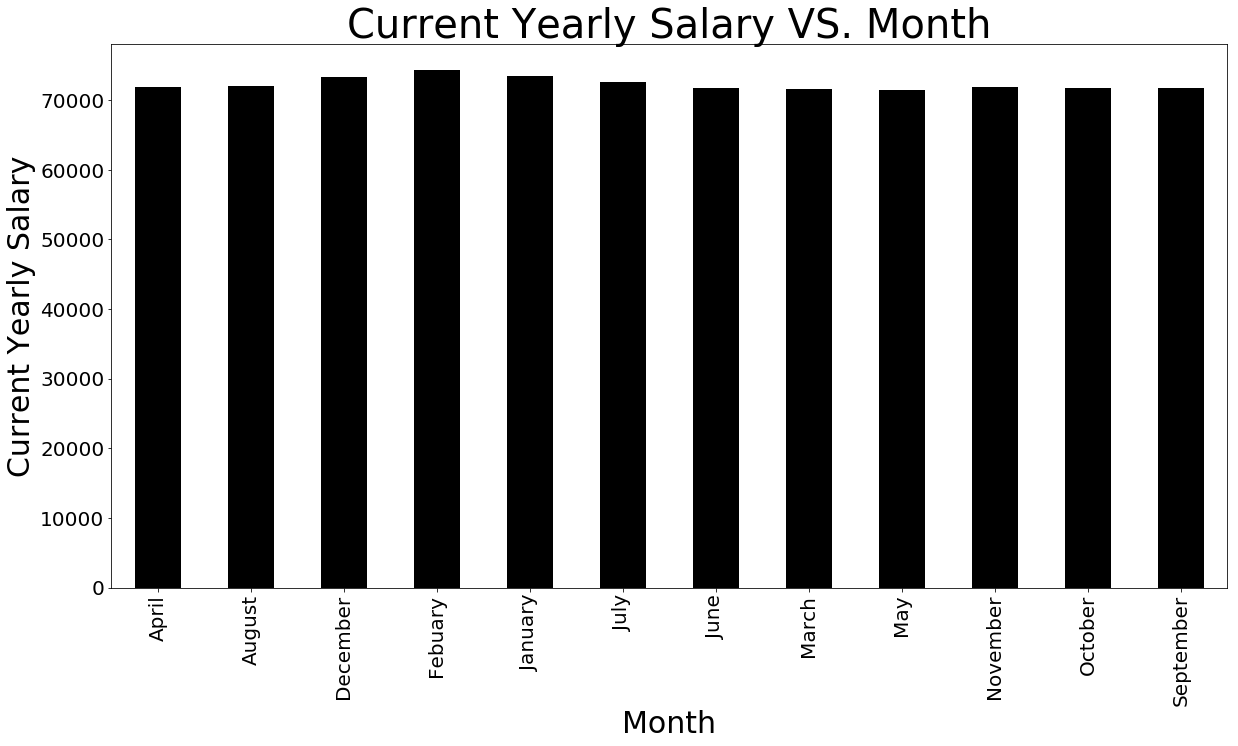

In [717]:
#Average salary based different months
Eng_Salary_na.groupby("Month")["Current Salary"].mean().plot(kind = 'bar',color = 'black') 
plt.title('Current Yearly Salary VS. Month',fontsize = 40)
plt.xlabel('Month',fontsize = 30)
plt.ylabel('Current Yearly Salary',fontsize = 30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

In [50]:
#Promotion_PROB_PER_EMP
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
identical_emp = Remove(Eng_Salary_na["Employee #"])
identical_pos = Remove(Eng_Salary_na["Position Description"])
employ_infor = {}
for i in identical_emp:
    employ_infor[i] = []
    for salary in Eng_Salary_na[Eng_Salary_na['Employee #']==i]['Current Salary']:
            employ_infor[i] = employ_infor[i]+[salary]
employee_promotion_pro = {}
for item in employ_infor: 
    employee_promotion_pro[item] = []
    change_times = len(Remove(employ_infor[item]))
    length = len(employ_infor[item])
    if length>=12:
        salary_increasing_period = change_times/(length/12)
    else:
        salary_increasing_period = change_times/length
    employee_promotion_pro[item] = salary_increasing_period

employee_promotion_pro_final={}
title_list = []
for name in employee_promotion_pro:
    for i, row in Eng_Salary_na.iterrows():
        if row["Employee #"] == name:
            title = row["Position Description"]
            #title_list.append(title)
            if title not in title_list:
                employee_promotion_pro_final[title]=[employee_promotion_pro[name]]
                title_list.append(title)
                break
            else:
                employee_promotion_pro_final[title]=[employee_promotion_pro[name]]+employee_promotion_pro_final[title]
                break

In [66]:
a =Eng_Salary_na.groupby("Position Description")["Current Salary"].count()
a
great_num = ["ARCHITECT 3","ASST CITY ENGINEER","CCTV INSPEC TECH","CONSTRUCT INSP 1","CONSTRUCT INSP 2","CONSTRUCTION MGR","CUSTODIAL WKR 2","ELECTRICIAN","ENGINEER 2","ENGINEER 3","ENGINEER 4","ENGR FIELD AIDE","ENGR PROG SPEC 1","MAINT MECH 1","STR SEWER MACH OPR 1","STR SEWER MACH OPR 2","SURVEYOR 2","S/D MAINT TECH 2"]

Text(0, 0.5, 'Average Current Salary')

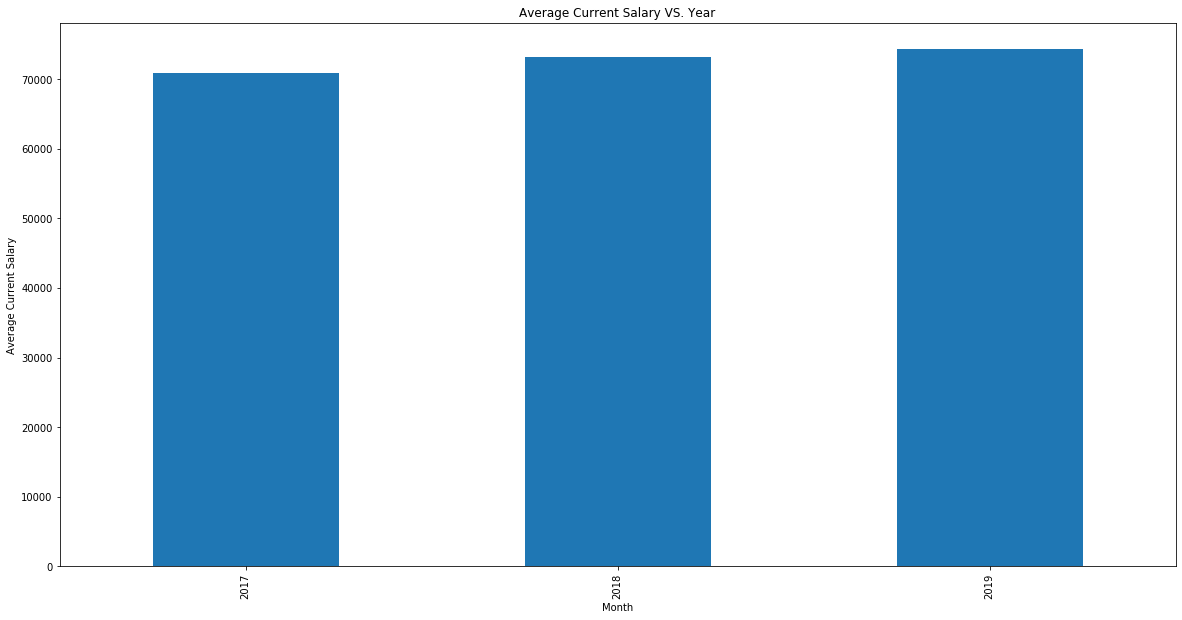

In [63]:
#Average salary vs. year
Eng_Salary_na.groupby("Year")["Current Salary"].mean().plot(kind = 'bar')
plt.title('Average Current Salary VS. Year')
plt.xlabel('Month')
plt.ylabel('Average Current Salary')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

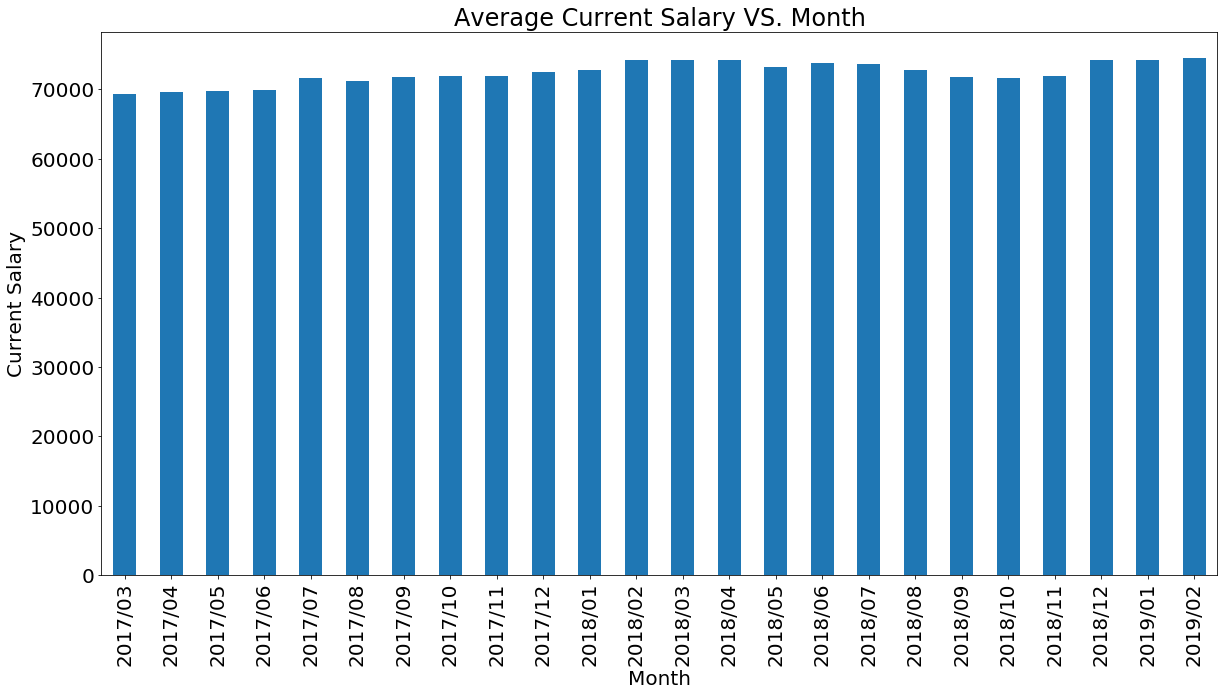

In [719]:
#Average salary vs. time
Eng_Salary_na.groupby("YearMonth")["Current Salary"].mean().plot(kind = 'bar')
plt.title("Average Current Salary VS. Month")
plt.xlabel('Month')
plt.ylabel('Current Salary')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

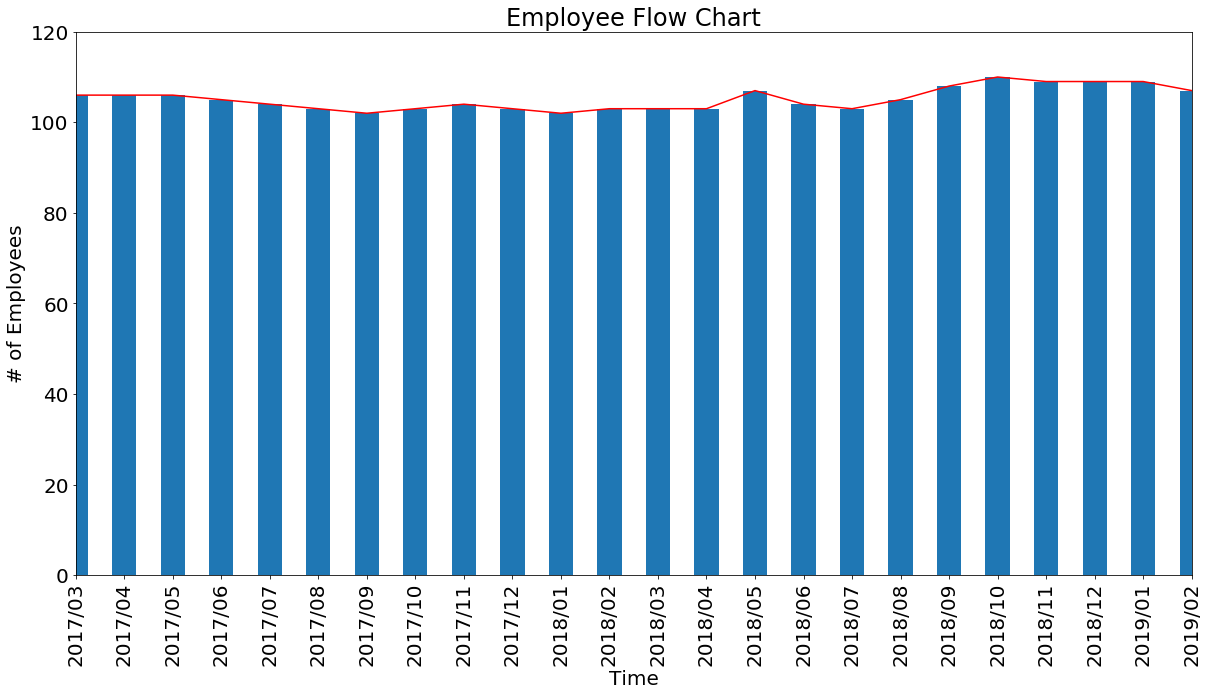

In [720]:
#Employee Flow Chart
counts = Eng_Salary_na["YearMonth"].value_counts().sort_index()
ax = counts.plot.bar() 
ax = counts.plot.line(color = "red") 
ax.set_ylim(top=120)
ax.set_title('Employee Flow Chart')
ax.set_xlabel('Time')
ax.set_ylabel('# of Employees')
plt.xticks(rotation=90)

([], <a list of 0 Text xticklabel objects>)

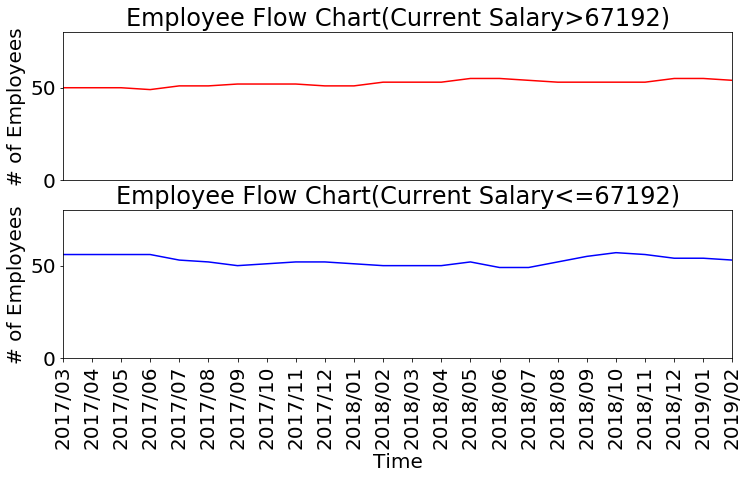

In [721]:
#Topic: Employee Flow Rates Analysis Based on Different Levels of Salaries
#To analyse whether salary will affect the employee's flow rates
#Using 67192 as the boundary because 67192 is the median of the yearly salary
Eng_Salary_na["Current Salary"].median()
#/len(Eng_Salary_na["Current Salary"])#Average is 67192
fig = plt.figure()
ax1 = fig.add_subplot(2,1,2)
#Employee Flow Chart for salary less than 67192
counts = Eng_Salary_na[Eng_Salary_na["Current Salary"]<=47426.5]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(color = "blue",figsize=(12,6)) 
ax.set_ylim(top=80)
ax.set_ylim(bottom=0)
ax.set_xlabel('Time')
ax.set_ylabel('# of Employees')
ax.set_title('Employee Flow Chart(Current Salary<=67192)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['2017/03','2017/04','2017/05','2017/06','2017/07','2017/08','2017/09','2017/10','2017/11','2017/12','2018/01','2018/02','2018/03','2018/04','2018/05','2018/06','2018/07','2018/08','2018/09','2018/10','2018/11','2018/12','2019/01','2019/02'],rotation=90)
ax2 = fig.add_subplot(2,1,1)
#Employee Flow Chart for salary greater than 67192
counts = Eng_Salary_na[Eng_Salary_na["Current Salary"]>67192]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(color = "red") 
ax.set_ylim(top=80)
ax.set_ylim(bottom=0)
ax.set_title('Employee Flow Chart')
ax.set_ylabel('# of Employees')
ax.set_title('Employee Flow Chart(Current Salary>67192)')
plt.xticks([], [])
#Conclusion: Based on the plots, positions with lower salary tends to have greater volatility

c:\users\xi97x\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


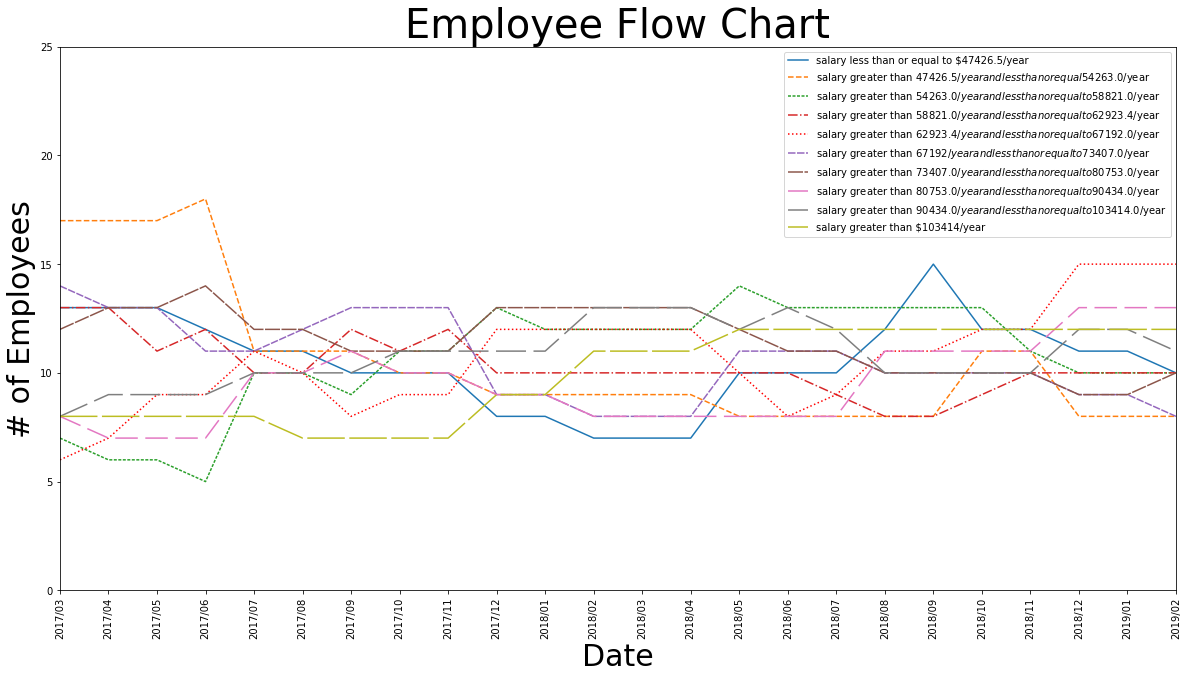

In [159]:
#Topic: Employee Flow Rates Analysis Based on Different Levels of Salaries
#To analyse whether salary will affect the employee's flow rates
#Using 67192 as the boundary because 67192 is the median of the yearly salary
Eng_Salary_na["Current Salary"].median()
#/len(Eng_Salary_na["Current Salary"])#Average is 67192
linestyles = ['-', '--', '-.', ':']
#Employee Flow Chart for salary less than 67192
counts = Eng_Salary_na[Eng_Salary_na["Current Salary"]<=47426.5]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(label='salary less than or equal to $47426.5/year',figsize=(20,10)) 
#Employee Flow Chart for salary greater than 67192
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 54263.0)&(Eng_Salary_na["Current Salary"] > 47426.5) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],label ='salary greater than $47426.5/year and less than or equal $54263.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 58821.0)&(Eng_Salary_na["Current Salary"] > 54263.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],dashes=(2, 1),label ='salary greater than $54263.0/year and less than or equal to $58821.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 62923.4)&(Eng_Salary_na["Current Salary"] > 58821.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[2],label ='salary greater than $58821.0/year and less than or equal to $62923.4/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 67192.0)&(Eng_Salary_na["Current Salary"] > 62923.4) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[3],color = "red",label ='salary greater than $62923.4/year and less than or equal to $67192.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 73407.0)&(Eng_Salary_na["Current Salary"] > 67192.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],dashes=(5, 1),label ='salary greater than $67192/year and less than or equal to $73407.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 80753.0)&(Eng_Salary_na["Current Salary"] > 73407.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],dashes=(10, 1),label ='salary greater than $73407.0/year and less than or equal to $80753.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 90434.0)&(Eng_Salary_na["Current Salary"] > 80753.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],dashes=(15, 5),label ='salary greater than $80753.0/year and less than or equal to $90434.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 103414.0)&(Eng_Salary_na["Current Salary"] > 90434.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],dashes=(20, 5),label ='salary greater than $90434.0/year and less than or equal to $103414.0/year') 
counts = Eng_Salary_na[(Eng_Salary_na["Current Salary"] <= 170920.0)&(Eng_Salary_na["Current Salary"] > 103414.0) ]["YearMonth"].value_counts().sort_index()
ax = counts.plot.line(linestyle=linestyles[1],dashes=(25, 3),label ='salary greater than $103414/year') 
ax.set_ylim(top=25)
ax.set_ylim(bottom=0)
plt.xticks(rotation=90)
ax.set_title('Employee Flow Chart',fontsize = 40)
ax.set_ylabel('# of Employees',fontsize = 30)
ax.set_xlabel('Date',fontsize = 30)
matplotlib.rcParams["font.size"] = 10
ax.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['2017/03','2017/04','2017/05','2017/06','2017/07','2017/08','2017/09','2017/10','2017/11','2017/12','2018/01','2018/02','2018/03','2018/04','2018/05','2018/06','2018/07','2018/08','2018/09','2018/10','2018/11','2018/12','2019/01','2019/02'],rotation=90)
None
#Conclusion: Based on the plots, positions with lower salary tends to have greater volatility

In [723]:
###TODO Determine how does salary affect turnover
#Employee Flow Rate Calculations Based on Different Levels of Salaries
#Using 72184 as the boundary because 72184 is the average of yearly salary
def retire_rate(Dataset):
    dat_2017 = Dataset[Dataset["Year"] =="2017"]
    ls = {}
    prob=[]
    for i in ["March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2017[dat_2017["Month"] ==i]
        ls[i] = []
        for item in dat["Employee #"]:
            ls[i].append(item)
    num = 0
    for i in ls["March"]:
        if not i in ls["April"]:
            num +=1
    num = 0
    prob.append(num/len(ls['March']))
    
    for i in ls["April"]:
        if not i in ls["May"]:
            num +=1
    prob.append(num/len(ls['April']))

    num = 0
    for i in ls["May"]:
        if not i in ls["June"]:
            num +=1
    prob.append(num/len(ls['May']))

    num = 0
    for i in ls["June"]:
        if not i in ls["July"]:
            num +=1
    prob.append(num/len(ls['June']))

    num = 0
    for i in ls["July"]:
        if not i in ls["August"]:
            num +=1
    prob.append(num/len(ls['July']))

    num = 0
    for i in ls["August"]:
        if not i in ls["September"]:
            num +=1
    prob.append(num/len(ls['August']))
    num = 0
    for i in ls["September"]:
        if not i in ls["October"]:
            num +=1
    prob.append(num/len(ls['September']))


    num = 0
    for i in ls["October"]:
        if not i in ls["November"]:
            num +=1
    prob.append(num/len(ls['October']))
    num = 0
    for i in ls["November"]:
        if not i in ls["December"]:
            num +=1
    prob.append(num/len(ls['November']))
    dat_2018 = Dataset[Dataset["Year"] =="2018"]
    ls1 = {}
    for i in ["January","Febuary","March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2018[dat_2018["Month"] ==i]
        ls1[i] = []
        for item in dat["Employee #"]:
            ls1[i].append(item)

    num = 0
    for i in ls["December"]:
        if not i in ls1["January"]:
            num +=1
    prob.append(num/len(ls['December']))

    num = 0
    for i in ls1["January"]:
        if not i in ls1["Febuary"]:
            num +=1
    prob.append(num/len(ls1['January']))

    num = 0
    for i in ls1["Febuary"]:
        if not i in ls1["March"]:
            num +=1
    prob.append(num/len(ls1['Febuary']))

    num = 0
    for i in ls1["March"]:
        if not i in ls1["April"]:
            num +=1
    prob.append(num/len(ls1['March']))
    num = 0
    for i in ls1["April"]:
        if not i in ls1["May"]:
            num +=1
    num = 0
    prob.append(num/len(ls1['April']))
    
    for i in ls1["May"]:
        if not i in ls1["June"]:
            num +=1
    prob.append(num/len(ls1['May']))

    num = 0
    for i in ls1["June"]:
        if not i in ls1["July"]:
            num +=1
    prob.append(num/len(ls1['June']))

    num = 0
    for i in ls1["July"]:
        if not i in ls1["August"]:
            num +=1
    prob.append(num/len(ls1['July']))

    num = 0
    for i in ls1["August"]:
        if not i in ls1["September"]:
            num +=1
    prob.append(num/len(ls1['August']))

    num = 0
    for i in ls1["September"]:
        if not i in ls1["October"]:
            num +=1
    prob.append(num/len(ls1['September']))
    
    
    num = 0
    for i in ls1["October"]:
        if not i in ls1["November"]:
            num +=1
    prob.append(num/len(ls1['October']))

    num = 0
    for i in ls1["November"]:
        if not i in ls1["December"]:
            num +=1
    prob.append(num/len(ls1['November']))


    dat_2019 = Dataset[Dataset["Year"] =="2019"]
    ls2 = {}
    for i in ["January","Febuary"]:
        dat = dat_2019[dat_2019["Month"] ==i]
        ls2[i] = []
        for item in dat["Employee #"]:
            ls2[i].append(item)
        
    num = 0
    for i in ls1["December"]:
        if not i in ls2["January"]:
            num +=1
    prob.append(num/len(ls1['December']))

    num = 0
    for i in ls2["January"]:
        if not i in ls2["Febuary"]:
            num +=1
    prob.append(num/len(ls2['January']))
    sum = 0 
    for i in prob:
        sum = sum+i
    hire_rate = sum/len(prob)
    return(hire_rate)

def hire_rate(Dataset):
    dat_2017 = Dataset[Dataset["Year"] =="2017"]
    ls = {}
    for i in ["March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2017[dat_2017["Month"] ==i]
        ls[i] = []
        for item in dat["Employee #"]:
            ls[i].append(item)
    num = 0
    for i in ls["April"]:
        if not i in ls["March"]:
            num +=1
    prob = []
    prob.append(num/len(ls['March']))
    num = 0
    for i in ls["May"]:
        if not i in ls["April"]:
            num +=1
    num = 0
    prob.append(num/len(ls['April']))
    for i in ls["June"]:
        if not i in ls["May"]:
            num +=1
    prob.append(num/len(ls['May']))

    num = 0
    for i in ls["July"]:
        if not i in ls["June"]:
            num +=1
    prob.append(num/len(ls['June']))

    num = 0
    for i in ls["August"]:
        if not i in ls["July"]:
            num +=1
    prob.append(num/len(ls['July']))

    num = 0
    for i in ls["September"]:
        if not i in ls["August"]:
            num +=1
    prob.append(num/len(ls['August']))

    num = 0
    for i in ls["November"]:
        if not i in ls["September"]:
            num +=1
    prob.append(num/len(ls['September']))

    num = 0
    for i in ls["December"]:
        if not i in ls["November"]:
            num +=1
    prob.append(num/len(ls['November']))

    dat_2018 = Dataset[Dataset["Year"] =="2018"]
    ls1 = {}
    for i in ["January","Febuary","March","April","May","June","July","August","September","October","November","December"]:
        dat = dat_2018[dat_2018["Month"] ==i]
        ls1[i] = []
        for item in dat["Employee #"]:
            ls1[i].append(item)

    num = 0
    for i in ls1["January"]:
        if not i in ls["December"]:
            num +=1
    prob.append(num/len(ls['December']))

    num = 0
    for i in ls1["Febuary"]:
        if not i in ls1["January"]:
            num +=1
    prob.append(num/len(ls1['January']))

    num = 0
    for i in ls1["March"]:
        if not i in ls1["Febuary"]:
            num +=1
    prob.append(num/len(ls1['Febuary']))

    num = 0
    for i in ls1["April"]:
        if not i in ls1["March"]:
            num +=1
    prob.append(num/len(ls1['March']))
    num = 0
    for i in ls1["May"]:
        if not i in ls1["April"]:
            num +=1
    num = 0
    prob.append(num/len(ls1['April']))
    for i in ls1["June"]:
        if not i in ls1["May"]:
            num +=1
    prob.append(num/len(ls1['May']))

    num = 0
    for i in ls1["July"]:
        if not i in ls1["June"]:
            num +=1
    prob.append(num/len(ls1['June']))

    num = 0
    for i in ls1["August"]:
        if not i in ls1["July"]:
            num +=1
    prob.append(num/len(ls1['July']))

    num = 0
    for i in ls1["September"]:
        if not i in ls1["August"]:
            num +=1
    prob.append(num/len(ls1['August']))

    num = 0
    for i in ls1["November"]:
        if not i in ls1["September"]:
            num +=1
    prob.append(num/len(ls1['September']))

    num = 0
    for i in ls1["December"]:
        if not i in ls1["November"]:
            num +=1
    prob.append(num/len(ls1['November']))


    dat_2019 = Dataset[Dataset["Year"] =="2019"]
    ls2 = {}
    for i in ["January","Feburary"]:
        dat = dat_2019[dat_2019["Month"] ==i]
        ls2[i] = []
        for item in dat["Employee #"]:
            ls2[i].append(item)
        
    num = 0
    for i in ls2["January"]:
        if not i in ls1["December"]:
            num +=1
    prob.append(num/len(ls1['December']))

    num = 0
    for i in ls2["Feburary"]:
        if not i in ls2["January"]:
            num +=1
    prob.append(num/len(ls2['January']))
    sum = 0 
    for i in prob:
        sum = sum+i
    hire_rate = sum/len(prob)
    return(hire_rate)
greater_67192 = Eng_Salary_na[Eng_Salary_na["Current Salary"]>67192]
lessorequal_67192= Eng_Salary_na[Eng_Salary_na["Current Salary"]<=67192]
a=retire_rate(greater_67192)#retiring rate which is greater than 67192
b=hire_rate(greater_67192)#hiring rate which is greater than 67192
c=retire_rate(lessorequal_67192)#retiring rate which is less or equal to 67192
d=hire_rate(lessorequal_67192)#hiring rate which is less or equal to 67192
x = {'retire_rate_greater_than_median':a,'retire_rate_less_than_median':c,'hire_rate_greater_than_median':b,'hire_rate_less_than_median':d}
x

#Conclusion:people making greater than $67192/year are 2.74% more likely to leave each year than those making more than $67192/year
#Conclusion:people making greater than $67192/year are 2.74% more likely to leave each year than those making more than $67192/year

{'retire_rate_greater_than_median': 0.010628918819335266,
 'retire_rate_less_than_median': 0.017039252965124797,
 'hire_rate_greater_than_median': 0.012835528359473785,
 'hire_rate_less_than_median': 0.013783631334651743}

In [724]:
#Promotion_PROB_PER_EMP
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
identical_emp = Remove(Eng_Salary_na["Employee #"])
identical_pos = Remove(Eng_Salary_na["Position Description"])
employ_infor = {}
for i in identical_emp:
    employ_infor[i] = []
    for salary in Eng_Salary_na[Eng_Salary_na['Employee #']==i]['Current Salary']:
            employ_infor[i] = employ_infor[i]+[salary]
employee_promotion_pro = {}
for item in employ_infor: 
    employee_promotion_pro[item] = []
    change_times = len(Remove(employ_infor[item]))
    length = len(employ_infor[item])
    if length>=12:
        salary_increasing_period = change_times/(length/12)
    else:
        salary_increasing_period = change_times/length
    employee_promotion_pro[item] = salary_increasing_period

employee_promotion_pro_final={}
title_list = []
for name in employee_promotion_pro:
    for i, row in Eng_Salary_na.iterrows():
        if row["Employee #"] == name:
            title = row["Position Description"]
            #title_list.append(title)
            if title not in title_list:
                employee_promotion_pro_final[title]=[employee_promotion_pro[name]]
                title_list.append(title)
                break
            else:
                employee_promotion_pro_final[title]=[employee_promotion_pro[name]]+employee_promotion_pro_final[title]
                break

In [725]:
####Simulator############

In [727]:
def listsum(numList):
    theSum = 0
    for i in numList:
        theSum = theSum + i
    return theSum
for position in employee_promotion_pro_final:
    employee_promotion_pro_final[position]=(listsum(employee_promotion_pro_final[position]))/(len(employee_promotion_pro_final[position]))
employee_promotion_pro_final

{'CUSTODIAL WKR 2': 1.317936507936508,
 'ARCHITECT 4': 1.0,
 'ENGINEER 3': 2.4148785996612085,
 'MAINT MECH 2': 2.466666666666667,
 'ELECTRICIAN': 2.011111111111111,
 'STR SEWER MACH OPR 2': 2.0,
 'PROGRAM ASST 2': 1.880952380952381,
 'CONSTRUCT INSP 1': 2.4,
 'STR SEWER MACH OPR 1': 2.105796055796056,
 'PRINCIPAL ENGR 2': 2.1153846153846154,
 'ENGINEER 4': 1.9684313725490195,
 'HYDROGEO 3': 2.5,
 'COMP MAP/GIS COORD': 2.5,
 'PRINCIPAL ENGR 1': 1.7478632478632479,
 'CONSTRUCT INSP 2': 2.144607843137255,
 'CIVIL TECH 2': 2.5,
 'ACCOUNTANT 3': 2.0,
 'PROGRAM ASST 1': 1.7999999999999998,
 'SIDEWALK PROG SUPERV': 2.5,
 'SURVEYOR 2': 2.25,
 'ENGR FINANCIAL MGR': 2.5,
 'MAINT MECH 1': 2.0,
 'ENGR CITY': 2.5,
 'PW DEV MGR 1': 3.5,
 'CONSTRUCTION SUPV': 2.5,
 'ENGR PROG SPEC 1': 1.9333333333333333,
 'ADMIN ASST': 2.5,
 'ENGR FIELD AIDE': 2.5,
 'STR SEWER MACH OPR 3': 3.0,
 'ASST CITY ENGINEER': 1.45,
 'S/D MAINT TECH 2': 2.25,
 'SEWER REPAIR LDWKR': 3.0,
 'PROGRAM ASST 3': 2.5,
 'ARCHITECT 3':

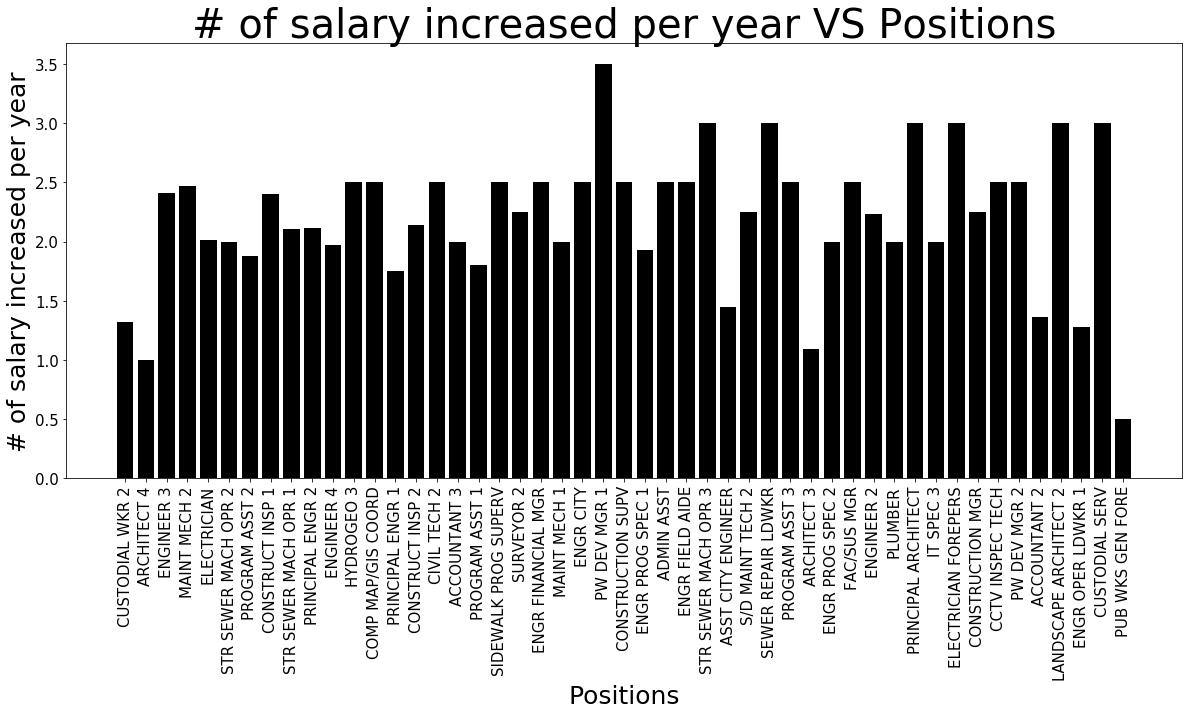

In [728]:

plt.rcParams["font.size"] = 15
plt.bar(*zip(*employee_promotion_pro_final.items()),color='black')
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.xticks(rotation='vertical')
plt.title('# of salary increased per year VS Positions',fontsize=40)
plt.ylabel('# of salary increased per year',fontsize=25)
plt.xlabel('Positions',fontsize=25)

None

In [729]:
#Starting salary based on different positions
employ_infor
start_salary={}
title_list = []
for name in employ_infor:
    for i, row in Eng_Salary_na.iterrows():
        if row["Employee #"] == name:
            title = row["Position Description"]
            #title_list.append(title)
            if title not in title_list:
                title_list.append(title)
                start_salary[title]=[employ_infor[name]]
                break

In [730]:
##Run Simulator
salary = {}
next_id = 1000
PROMOTION_AMOUNT = 1+((Eng_Salary_na[Eng_Salary_na["YearMonth"] == '2019/02']['Current Salary'].mean()-Eng_Salary_na[Eng_Salary_na["YearMonth"] == '2017/03']['Current Salary'].mean())/Eng_Salary_na[Eng_Salary_na["YearMonth"] == '2017/03']['Current Salary'].mean())/24
RETIRE_PROB_PER_EMP = retire_rate(Eng_Salary_na)
HIRE_PROB = hire_rate(Eng_Salary_na)

In [731]:
RETIRE_PROB_PER_EMP

0.011116256858439977

In [733]:
def gen_emp_id():
    global next_id
    next_id += 1
    return str(next_id)

lst = {}
agency = {}
for i, row in Eng_Salary_na[Eng_Salary_na['Year'] == '2018'].iterrows():
    agency[gen_emp_id()] = {"salary": row['Current Salary'], "position": "engineer","position description":row['Position Description']}

def simulate_one_year(prior_employees):
    employees = copy.deepcopy(prior_employees)

    for employee in employees.values():
        employee["salary"] = employee["salary"] * (1+(PROMOTION_AMOUNT-1)*employee_promotion_pro_final[employee['position description']])
    
    emp_ids = list(employees.keys())
    for eid in emp_ids:
        if random.random() < RETIRE_PROB_PER_EMP:
            employees.pop(eid)
            
        if random.random() < HIRE_PROB:
            position =random.choice(identical_pos)
            employees[gen_emp_id()] = {"salary":start_salary[position][0][0], "position": "engineer","position description":position}
        
    return employees




In [752]:
RETIRE_PROB_PER_EMP

0.011116256858439977

In [735]:
def sim_years(start, years):
    history = [start]
    for i in range(years):
        history.append(simulate_one_year(history[-1]))
    return history

In [736]:
history = sim_years(agency, 10)

In [737]:
def employees_each_year(history):
    count = []
    for snapshot in history:
        count.append(len(snapshot)//12)
    return pd.Series(count)

def salary_each_year(history):
    salaries = []
    for snapshot in history:
        total = 0
        for emp in snapshot.values():
            total += emp["salary"]
        total = total / 12
        salaries.append(total)
    return pd.Series(salaries)

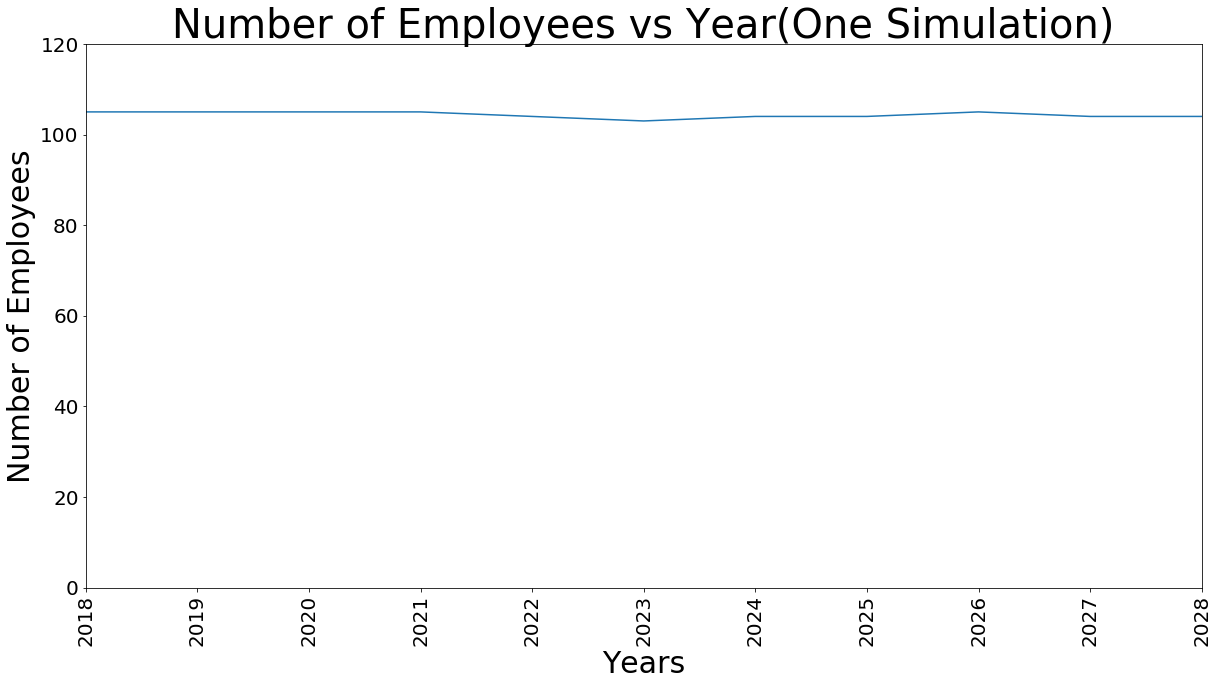

In [738]:
plt.rcParams["font.size"] = 20
s = employees_each_year(history)
ax = s.plot.line(xlim=0, ylim=0,figsize=(20,10))
ax.set_xlabel("Years",fontsize  = 30)
ax.set_ylabel("Number of Employees",fontsize  = 30)
ax.set_title('Number of Employees vs Year(One Simulation)',fontsize  = 40)
ax.set_ylim(top=120)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028'],rotation=90)
None

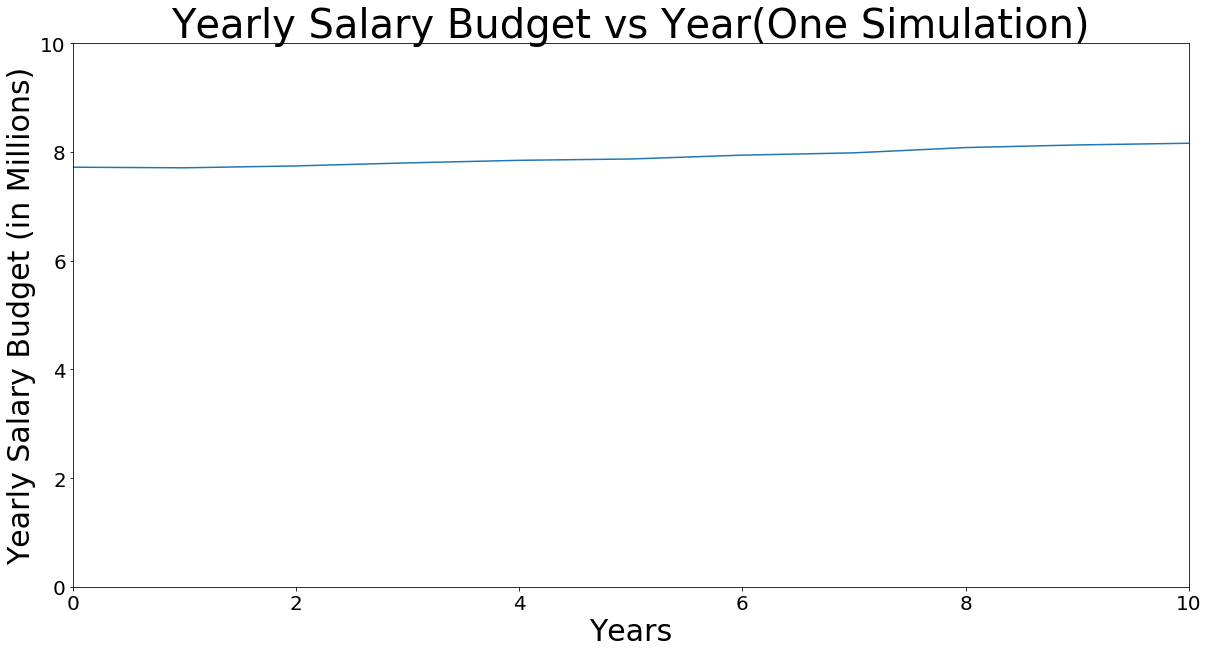

In [754]:
plt.rcParams["font.size"] = 20
s = salary_each_year(history) / 1000000
ax = s.plot.line(xlim=0, ylim=0,figsize=(20,10))
ax.set_xlabel("Years",fontsize = 30)
ax.set_ylabel("Yearly Salary Budget (in Millions)",fontsize = 30)
ax.set_title('Yearly Salary Budget vs Year(One Simulation)',fontsize = 40) 
ax.set_ylim(top=10)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028'],rotation=90)
None



In [757]:
#For 1000 simulations for 2028
salaries = []

for i in range(1000):
    history = sim_years(agency, 10)
    total = 0
    for employee in history[10].values():
        total += employee["salary"]
    salaries.append(total/12)

# let's see a few outcomes:
sum = 0
for i in salaries:
    sum = i + sum


8.138127109279123

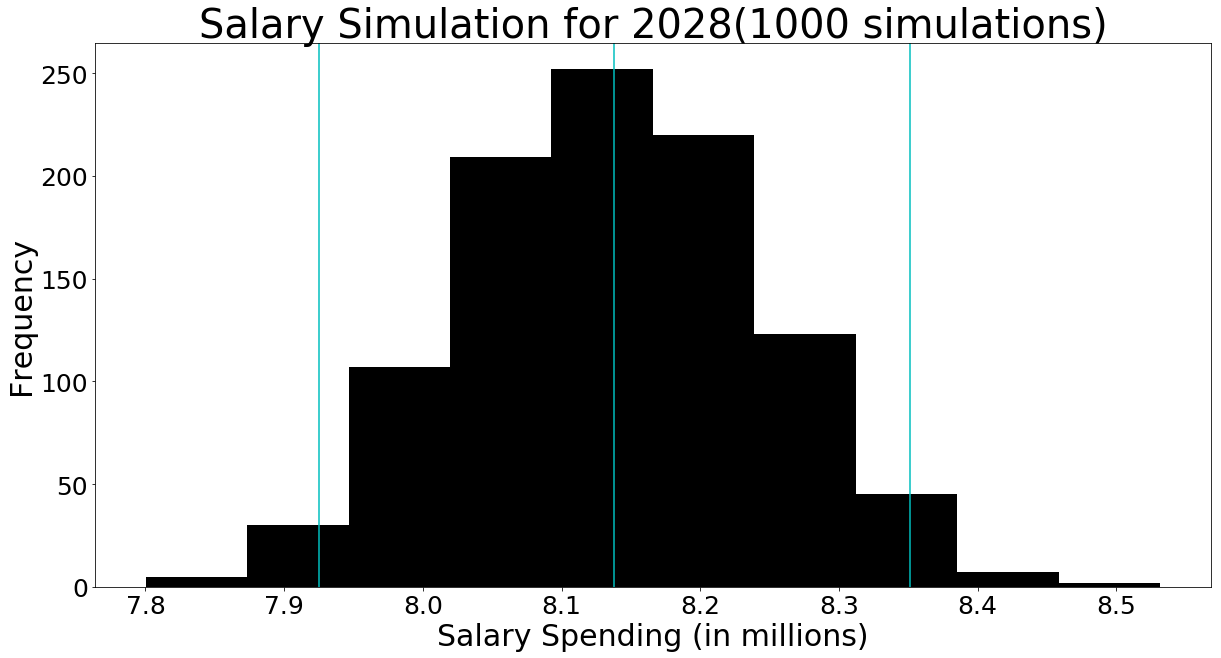

In [758]:
s = pd.Series(salaries) / 1000000  
plt.rcParams["font.size"] = 25
ax = s.plot.hist(color = 'k')
ax.set_xlabel("Salary Spending (in millions)",fontsize = 30)
ax.set_ylabel("Frequency",fontsize = 30)
plt.axvline(sum/len(salaries)/1000000,color='c')
plt.axvline((sum/len(salaries)-1.96*np.std(salaries))/1000000,color='c')
plt.axvline((sum/len(salaries)+1.96*np.std(salaries))/1000000,color='c')
plt.title('Salary Simulation for 2020(1000 simulations)',fontsize = 40)
(sum/len(salaries)+1.96*np.std(salaries))/1000000
sum/len(salaries)
sum/len(salaries)/1000000

In [749]:
#For 1000 simulations for 2019
salaries = []

for i in range(1000):
    history = sim_years(agency, 10)
    total = 0
    for employee in history[1].values():
        total += employee["salary"]
    salaries.append(total/12)

# let's see a few outcomes:
sum = 0
for i in salaries:
    sum = i + sum

7.761221078388523

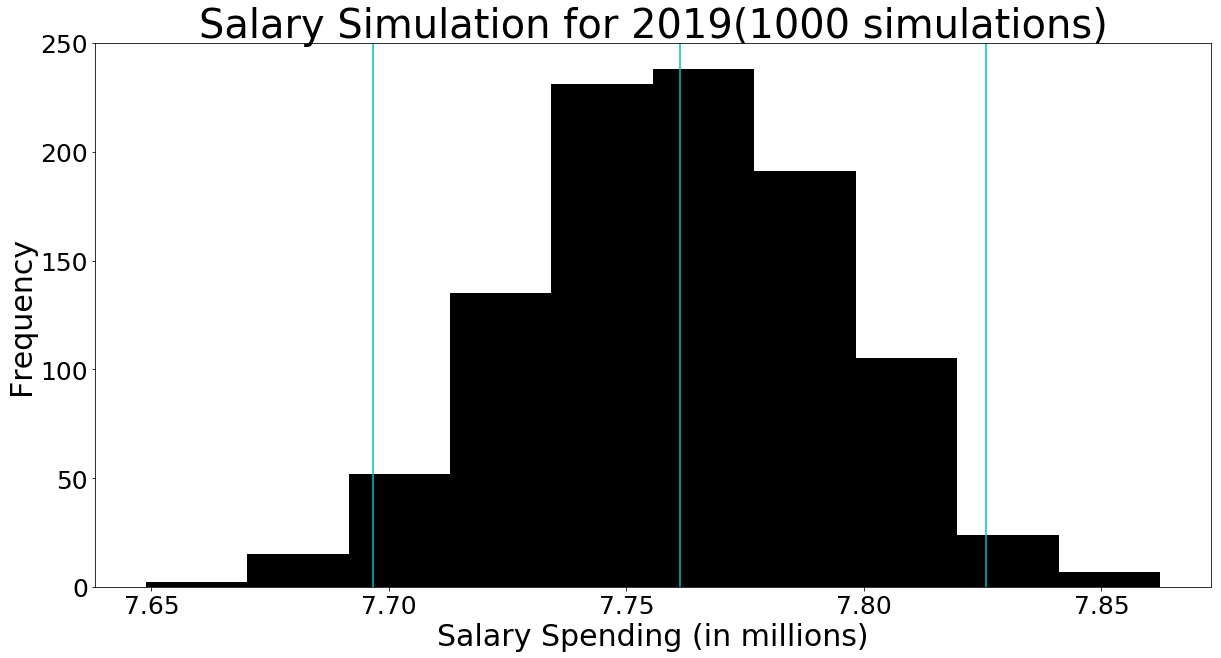

In [755]:
s = pd.Series(salaries) / 1000000  
plt.rcParams["font.size"] = 25
ax = s.plot.hist(color = 'k')
ax.set_xlabel("Salary Spending (in millions)",fontsize = 30)
ax.set_ylabel("Frequency",fontsize = 30)
plt.axvline(sum/len(salaries)/1000000,color='c')
plt.axvline((sum/len(salaries)-1.96*np.std(salaries))/1000000,color='c')
plt.axvline((sum/len(salaries)+1.96*np.std(salaries))/1000000,color='c')
plt.title('Salary Simulation for 2019(1000 simulations)',fontsize = 40)
(sum/len(salaries)+1.96*np.std(salaries))/1000000
sum/len(salaries)
sum/len(salaries)/1000000